# Real Estate Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing_data=pd.read_csv("Downloads/HousingData.csv")

In [4]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### CRIM: Per capita crime rate by town. It indicates the level of crime in the area.
#### ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. This feature reflects the area's residential density.
#### INDUS: Proportion of non-retail business acres per town. This is an indicator of the commercial use of land away from residential areas.
#### CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). This indicates whether the property is near the Charles River, which may add to the aesthetic value of the neighborhood.
#### NOX: Nitric oxides concentration (parts per 10 million). It represents the level of industrial pollutants in the area.
#### RM: Average number of rooms per dwelling. More rooms typically indicate more spacious accommodation.
#### AGE: Proportion of owner-occupied units built prior to 1940. Older structures might lack newer amenities or could be considered more prestigious depending on the architecture and condition.
#### DIS: Weighted distances to five Boston employment centres. This feature measures the accessibility to workplaces, which can influence housing prices.
#### RAD: Index of accessibility to radial highways. Higher values indicate easier access to major roadways.
#### TAX: Full-value property-tax rate per 10,000. This reflects the annual property tax rate.
#### PTRATIO: Pupil-teacher ratio by town. Lower values typically indicate better educational facilities, which is a significant factor for families when choosing a home.
#### MEDV- Median Value of Houses in  1000
#### LSTAT- % Lower status people in a locality

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# we have null values in CRIM ZN INDUS AGE 

In [7]:
housing_data.shape

(506, 14)

In [8]:
housing_data.isnull().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [9]:
housing_data.isnull().sum()
# missing data points can either be deleted, the attribute can be deleted if too many missing points or replace the value with 0,mean or median

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
### Replacing Null Values

In [11]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
import matplotlib.pyplot as plt

In [13]:
housing_data['CRIM'].fillna(value=housing_data['CRIM'].median() , inplace=True)

In [14]:
housing_data['CRIM'].median()

0.253715

In [15]:
housing_data['CRIM'].isnull().any()

False

In [16]:
housing_data['ZN'].fillna(value=housing_data['ZN'].median(),inplace=True)

In [17]:
housing_data['INDUS'].fillna(value=housing_data['INDUS'].mean(),inplace=True)

In [18]:
housing_data['CHAS'].fillna(value=0,inplace=True)

In [19]:

age=housing_data['AGE']

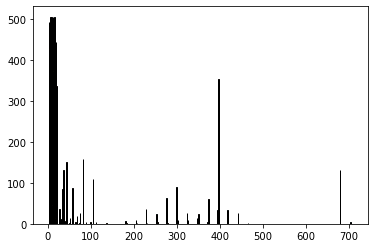

In [20]:
plt.hist(housing_data,bins=30,edgecolor='black')
plt.show()

In [21]:
housing_data['AGE'].fillna(value=housing_data['AGE'].median(),inplace=True)

In [22]:
housing_data['LSTAT'].fillna(value=housing_data['LSTAT'].median(),inplace=True)

In [23]:
housing_data['CHAS'].value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

In [24]:
# We check the value_counts of categorical variables to see if there is any error value/unexpected value

In [25]:
housing_data.describe()
# 75% data lies  below 2.8% for crim



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.083992,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.699165,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.900000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


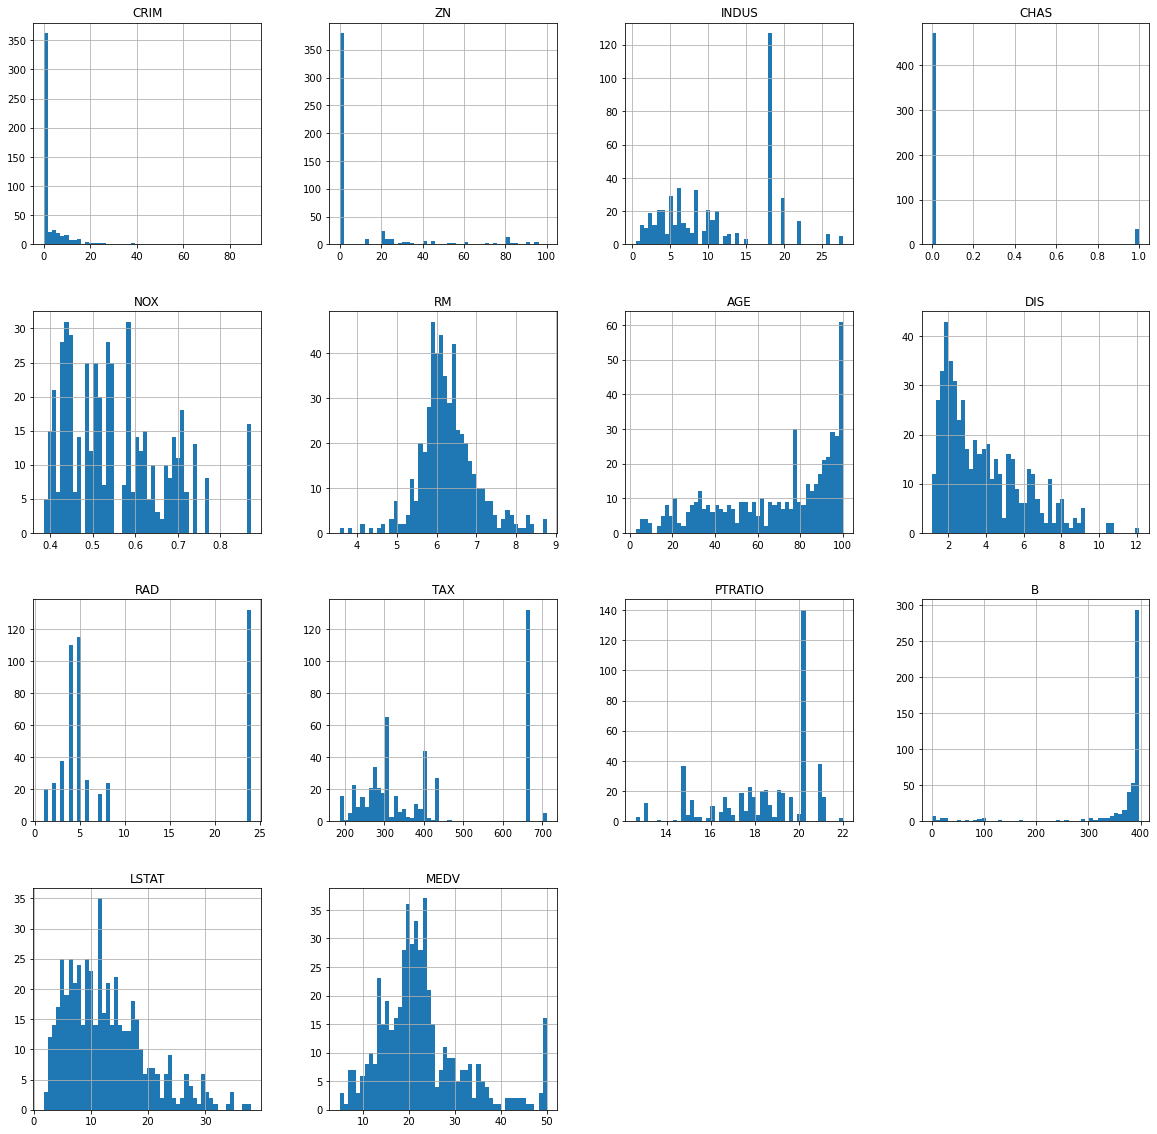

In [26]:
housing_data.hist(bins=50, figsize=(20,20))
plt.show()

In [27]:
# train test split using sklearn
from sklearn.model_selection import train_test_split
training_set1,test_set1=train_test_split(housing_data,test_size=0.2,random_state=42)

In [28]:
## Looking for correlations

In [29]:
correlation_matrix=housing_data.corr()

In [30]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392063,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507800,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392063,-0.507800,1.000000,0.054172,0.740965,-0.381457,0.616917,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567859,-0.478657
CHAS,-0.055585,-0.032992,0.054172,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.740965,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.381457,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.616917,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.699639,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.593176,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716062,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


In [31]:
correlation_matrix['MEDV']
# we have to check correlation between output and input variables


CRIM      -0.383895
ZN         0.362292
INDUS     -0.478657
CHAS       0.183844
NOX       -0.427321
RM         0.695360
AGE       -0.377572
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.723093
MEDV       1.000000
Name: MEDV, dtype: float64

In [32]:
correlation_matrix['MEDV'].sort_values(ascending=False)
# Here we can see RM ZN are strongly positively correlated andLSTAT PTRATIO are negatively correlated
# We'll consider values of corr above 0.5 for prediciton
# thatis RM LSTAT PTRATIO and maybe INDus


MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='RM', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='PTRATIO'>]], dtype=object)

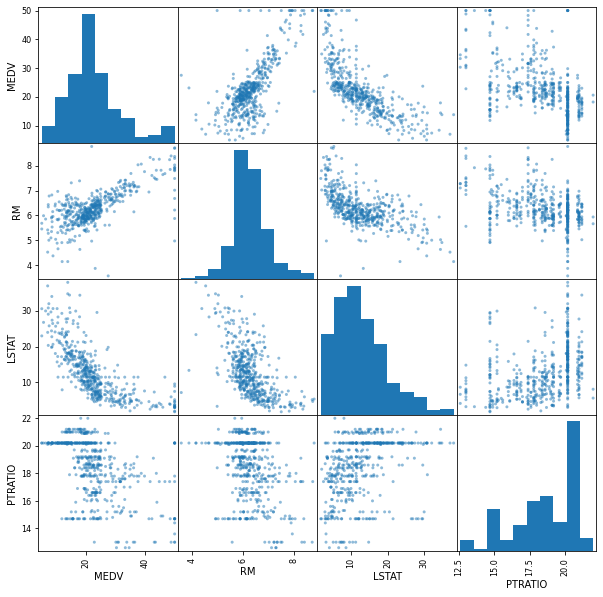

In [33]:
from pandas.plotting import scatter_matrix
attr=['MEDV','RM','LSTAT','PTRATIO']
# attr stores columns of interest
scatter_matrix(housing_data[attr],figsize=(10,10))

In [34]:
# As we can see above along the diagonal are histograms of how data is distributed
# and then the scatter plots of different attributes against each other are plotted
# wih the scatter plot we can not see clear relation between PTRATIO and medv so lets discard PTRATio
attr=['MEDV','RM','LSTAT']


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

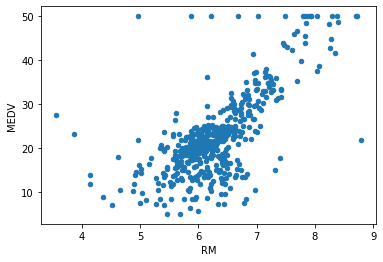

In [35]:
housing_data.plot(kind='scatter',x='RM',y='MEDV')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

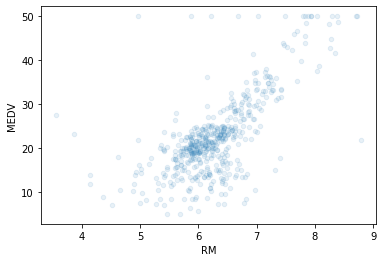

In [36]:
housing_data.plot(kind='scatter',x='RM',y='MEDV',alpha=0.1)

In [37]:
## Deleting outliers

In [38]:
## Scikit learn design

In [39]:
##### In scikit learn we have 3 typesof objects
##### 1. Estimators- calculates avg, median value estimates. For eg: Imputer function calculates median and fits. It has a fit and transform method
##### fit function  takes dataset and understands it to calculate/estimate values
##### 2. Transformers- returns output based on fit() function fit_transform() does both
##### 3. Predictors- LinearRegression model of sklearn predicts. has two functions fit and predict fits the test dataset or sees the test and then predicts on what it has learnt. also returns score function to analyse how the model performs falso positive, false negative, true positive true negative


In [40]:
# fit is used to understand the data, scaler or encoder is fitted onto the data
# transform is used to apply the knowledge gained by the model to the data


In [43]:
x=housing_data.loc[:,['RM','LSTAT','PTRATIO']]

In [45]:
y=housing_data.loc[:,'MEDV']

In [47]:
x.head(100)

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,11.43,18.7
...,...,...,...
95,6.625,6.65,18.0
96,6.163,11.34,18.0
97,8.069,4.21,18.0
98,7.820,3.57,18.0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [49]:
x

array([[ 0.41367189, -1.09619345, -1.45900038],
       [ 0.19427445, -0.50277932, -0.30309415],
       [ 1.28271368, -1.23170869, -0.30309415],
       ...,
       [ 0.98496002, -1.00204601,  1.17646583],
       [ 0.72567214, -0.88222201,  1.17646583],
       [-0.36276709, -0.68251533,  1.17646583]])

In [50]:
x.shape

(506, 3)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
model.predict([ [0.41367189, -1.09619345, -1.45900038],])

array([31.1608566])

In [56]:
# actual value is 24

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
y_pred=model.predict(x_test)

In [60]:
y_pred

array([26.89486514, 30.84917419, 16.49142999, 24.97481654, 18.36657413,
       22.68559826, 17.51000563, 12.89104224, 20.6010215 , 19.66996546,
       19.68847039, 21.47630994, -1.5787035 , 22.24618712, 19.30158476,
       25.02143363, 17.16196921,  3.84233049, 39.32557101, 17.33208787,
       22.90175041, 27.4038845 , 11.77523224, 22.46968599, 17.89128674,
       13.70991209, 21.06741731, 19.58539383, 18.16957317, 18.69209936,
       19.5823836 , 25.36739676, 25.4412128 , 18.02321521, 14.60859888,
       21.27160799, 32.41922787, 20.66888248, 20.1836245 , 22.39655491,
       12.6704539 , 28.25168247, 39.87196334, 18.5898167 , 25.97529495,
       15.67340451, 14.18961713, 25.956308  , 18.31628423, 31.16085658,
       23.72754474, 33.61533863, 16.07841676, 25.64146555, 38.51730052,
       22.32878379, 18.38990384, 30.04609129, 24.7534192 , 15.34296208,
       25.54466087, 32.18277407, 29.90895482, 16.89393977, 28.23809335,
       11.84599679, 19.28394907, 25.58400181, 28.99485497, 15.82

In [63]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

26.061096108340013


In [64]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

3.576106940435711


In [65]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.6502481086079239


In [57]:
x1=housing_data.iloc[:,:13]
y1=housing_data.iloc[:,13]

In [66]:
x1=scaler.fit_transform(x1)
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [67]:
model1=LinearRegression()
model1.fit(x1_train,y1_train)

LinearRegression()

In [70]:
y1_pred=model1.predict(x1_test)

In [72]:
mse1=mean_squared_error(y1_test,y1_pred)
print(mse1)

21.783005057575913


In [73]:
from sklearn.metrics import r2_score
r21=r2_score(y1_test,y1_pred)
print(r21)

0.707662057366335


In [74]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.2,random_state=42)
model2=LinearRegression()
model2.fit(x2_train,y2_train)

LinearRegression()

In [76]:
y2_pred=model2.predict(x2_test)

In [77]:
mse2=mean_squared_error(y2_test,y2_pred)
print(mse2)

27.404250288062286
